<a href="https://www.kaggle.com/code/omarreess/aerial-images-semantic-segmentation-u-net?scriptVersionId=112082818" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Aerial Drone Images Semantic Segmentation 
 * Evaluating Data  
 * Model Selection for Segmentation Algorithms 
 * VGG U-Net Model
 * VGG Seg-Net Model
 * U-Net Basic Architecture Model (Encoder-Decoder Pattern)


# **Importing**


In [1]:
# Import Libs

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd 
from PIL import Image
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python
!pip install git+https://github.com/divamgupta/image-segmentation-keras
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.models.segnet import vgg_segnet
from keras.preprocessing import image
from keras.preprocessing.image import  load_img




libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.4-0ubuntu1).
The following additional packages will be installed:
  libpthread-stubs0-dev libx11-dev libxau-dev libxcb1-dev libxdmcp-dev
  x11proto-core-dev x11proto-dev xorg-sgml-doctools xtrans-dev
Suggested packages:
  libx11-doc libxcb-doc
The following NEW packages will be installed:
  libpthread-stubs0-dev libx11-dev libxau-dev libxcb1-dev libxdmcp-dev
  libxrender-dev x11proto-core-dev x11proto-dev xorg-sgml-doctools xtrans-dev
0 upgraded, 10 newly installed, 0 to remove and 93 not upgraded.
Need to get 1471 kB of archives.
After this operation, 5658 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libpthread-stubs0-dev amd64 0.4-1 [5384 B]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 xorg-sgml-doctools all 1:1.11-1 [12.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 x11proto-dev all 2019.2-1ubuntu1 [594 kB]


# **Evaluating Data** 

In [2]:
# Define data paths 

orignal_images_path = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/"
label_images_path = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/"

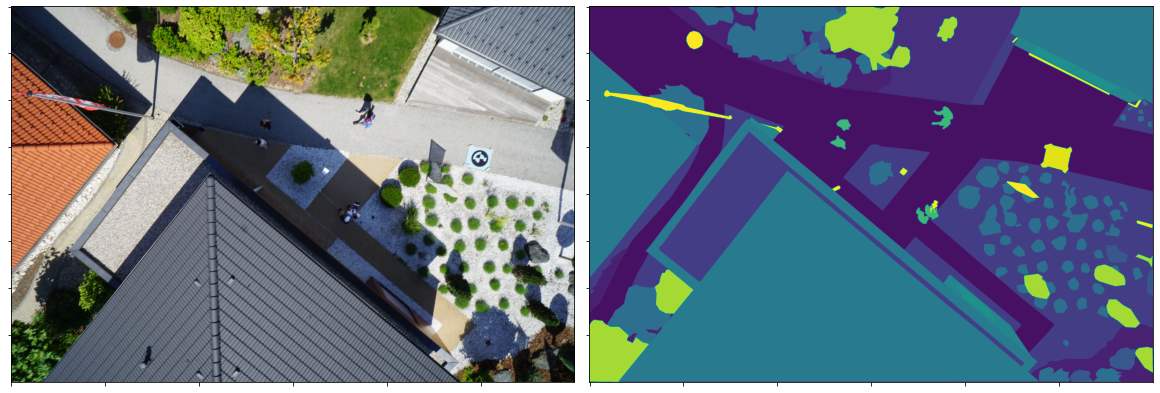

In [3]:
# Show input sample 
 
fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[0].imshow( Image.open(orignal_images_path+"005.jpg"))

axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
label_image_semantic = Image.open(label_images_path+"005.png")
axs[1].imshow(label_image_semantic)



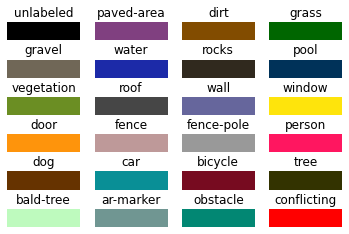

In [4]:

# Show labels colors 

label_colors = pd.read_csv('../input/semantic-drone-dataset/class_dict_seg.csv')
classess_number = len(label_colors)   

for index,label in enumerate(label_colors.name):
        plt.subplot(6,4,index+1)
        (r,g,b)=label_colors.iloc[index].values[1:]
        img_ = np.array([[[r,g,b],[r,g,b],[r,g,b],[r,g,b]]])
        plt.title(label)
        plt.imshow(img_)
        plt.axis('off')

# **Model Selection**

**VGG U-Net Model**

In [5]:
# Vgg Unet Model

IMG_HEIGHT = 416
IMG_WIDTH = 608

model_unet = vgg_unet(n_classes=classess_number ,  input_height=IMG_HEIGHT, input_width=IMG_WIDTH  )

model_unet.train( 
    train_images =  orignal_images_path,
    train_annotations = label_images_path,
    checkpoints_path = "vgg_unet" , epochs=5
)

2022-11-25 22:09:35.277868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 22:09:35.408226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 22:09:35.409067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 22:09:35.411012: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 4s 0us/step
Verifying training dataset


100%|██████████| 400/400 [04:38<00:00,  1.44it/s]


Dataset verified! 


2022-11-25 22:14:24.472120: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-11-25 22:14:26.523867: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


512/512 [==============================] - 691s 1s/step - loss: 1.3827 - accuracy: 0.6101

Epoch 00001: saving model to vgg_unet.00001
Epoch 2/5
512/512 [==============================] - 685s 1s/step - loss: 1.0420 - accuracy: 0.6859

Epoch 00002: saving model to vgg_unet.00002
Epoch 3/5
512/512 [==============================] - 685s 1s/step - loss: 0.9170 - accuracy: 0.7240

Epoch 00003: saving model to vgg_unet.00003
Epoch 4/5
512/512 [==============================] - 685s 1s/step - loss: 0.8254 - accuracy: 0.7521

Epoch 00004: saving model to vgg_unet.00004
Epoch 5/5
512/512 [==============================] - 686s 1s/step - loss: 0.7553 - accuracy: 0.7730

Epoch 00005: saving model to vgg_unet.00005


**VGG Seg-Net Model**

In [6]:
# Vgg Segnet Model

model_segnet = vgg_segnet(n_classes=classess_number ,  input_height=IMG_HEIGHT, input_width=IMG_WIDTH  )

model_segnet.train( 
    train_images =  orignal_images_path,
    train_annotations = label_images_path,
    checkpoints_path = "vgg_segnet" , epochs=1
)

Verifying training dataset


100%|██████████| 400/400 [03:40<00:00,  1.81it/s]


Dataset verified! 
512/512 [==============================] - 687s 1s/step - loss: 1.8178 - accuracy: 0.5237

Epoch 00001: saving model to vgg_segnet.00001


# **Conclusion** 

As we've got 75% accuracy from 5 Epoch with VGG U-Net compared with 65% with VGG Seg-Net

# **Predictions**

In [7]:
# Predicting Masks

org_image = orignal_images_path + "077.jpg"
org_label_image = label_images_path + "077.png"

predicted_image = model_unet.predict_segmentation(
    inp=org_image,
    out_fname="predicted.png"
)


Text(0.5, 1.0, 'Ground truth ')

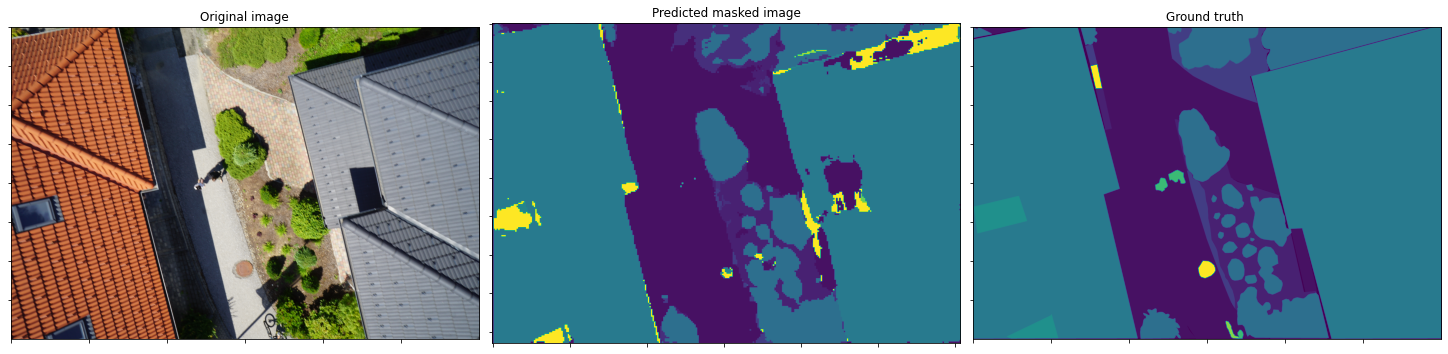

In [8]:
# Ploting Output Mask

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[0].imshow(Image.open(org_image))
axs[0].set_title('Original image')

axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
axs[1].imshow(predicted_image)
axs[1].set_title('Predicted masked image')

axs[2].set_yticklabels([])
axs[2].set_xticklabels([])
axs[2].imshow( Image.open(org_label_image))
axs[2].set_title('Ground truth ')


**U-Net Basic Arch Model**

In [9]:
## U-Net Model , Different Arch
import os
import zipfile

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import cv2

import tensorflow as tf
from keras import backend as K

from tensorflow.keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

inputs = Input((416, 608, 3))
s = tf.keras.layers.Lambda(lambda x: x/255.0)(inputs)

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

up6 = UpSampling2D(size=(2,2))(conv5)
up6 = concatenate([up6, conv4])
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

up7 = UpSampling2D(size=(2,2))(conv6)
up7 = concatenate([up7, conv3])
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

up8 = UpSampling2D(size=(2,2))(conv7)
up8 = concatenate([up8, conv2])
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

up9 = UpSampling2D(size=(2,2))(conv8)
up9 = concatenate([up9, conv1])
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

model = models.Model(inputs=[inputs], outputs=[conv10])

model.compile(optimizer='adam',  loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [10]:
model.summary()


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 416, 608, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 416, 608, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 416, 608, 32) 9248        conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 208, 304, 32) 0           conv2d_9[0][0]                   
____________________________________________________________________________________________

In [11]:
# handle & transform the data for model

data_limit = 10

images_dataset = np.array([np.array(load_img(str(orignal_images_path) + filename, target_size=(IMG_HEIGHT,IMG_WIDTH)))*1./255 for  filename  in os.listdir(orignal_images_path)if  os.listdir(orignal_images_path) .index(filename)<=data_limit ] )
masks_dataset = np.array([np.array(load_img(str(label_images_path ) + filename, target_size=(IMG_HEIGHT,IMG_WIDTH) , color_mode="grayscale"))*1./255 for  filename  in os.listdir(label_images_path) if  os.listdir(label_images_path) .index(filename)<=data_limit ] )


In [12]:

model.fit(  images_dataset, masks_dataset,    epochs=2 )


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 0.6961 - accuracy: 6.6853e-04
Epoch 2/2
1/1 [==============================] - 0s 417ms/step - loss: 0.6382 - accuracy: 0.0015


**Hint**

Loading images toke long time , it need to be generated by Image Data Generator 
as U-net model's accuracy very low with this small data 
